In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler as ss, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
df= pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Task1

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [8]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [9]:
df.promotion_last_5years.value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [10]:
df.sales.value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [11]:
df= df.rename(columns={'sales':'department','average_montly_hours':'average_monthly_hours'})

# Task2

In [13]:
df.drop(['department','salary'],axis=1).corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

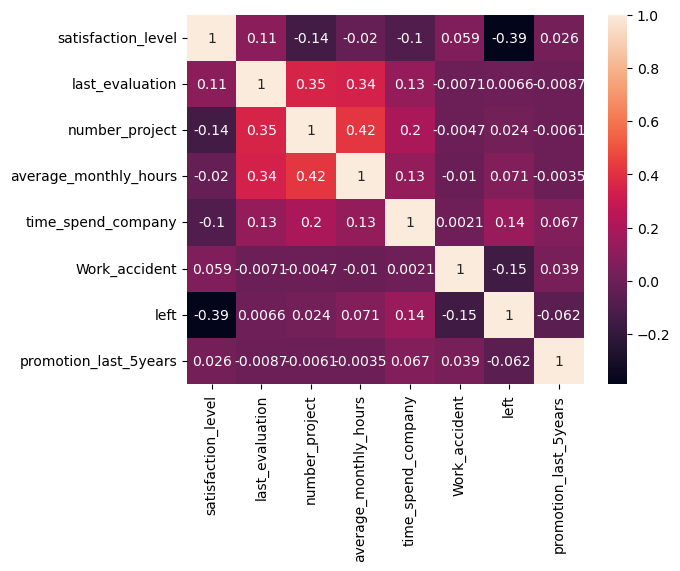

In [14]:
sns.heatmap(df.drop(['department','salary'],axis=1).corr(),annot=True)

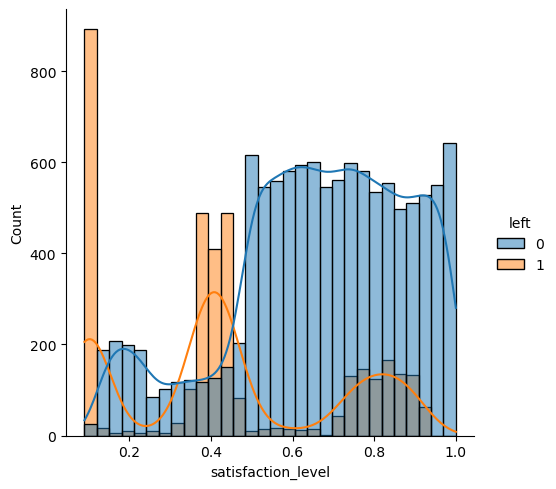

In [15]:
sns.displot(data=df, x='satisfaction_level',hue='left',kde=True)

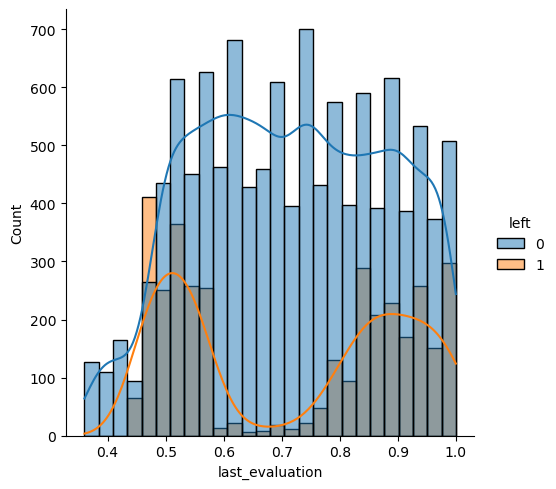

In [16]:
sns.displot(data=df, x='last_evaluation',hue='left',kde=True)

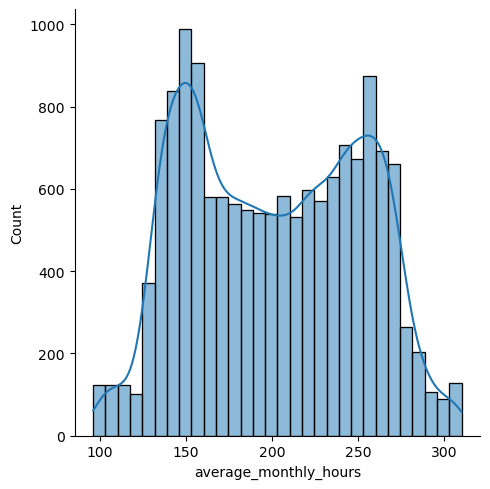

In [17]:
sns.displot(data=df, x='average_monthly_hours',kde=True)

<Axes: ylabel='number_project'>

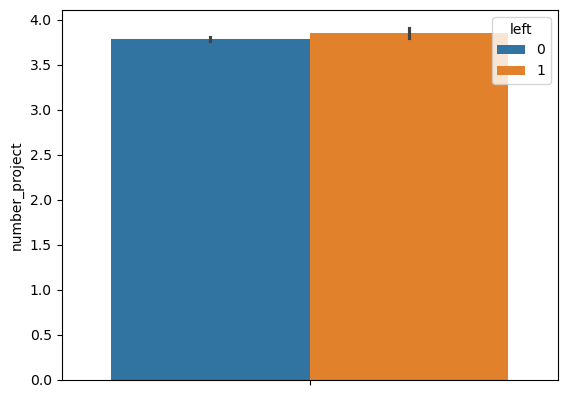

In [18]:
sns.barplot(data=df, y='number_project', hue='left')

#### People who left the organisation had more project work/load based on above chart

# Task3

In [21]:
cluster_df= df[df['left']==1][['satisfaction_level','last_evaluation']].reset_index()  #
cluster_df= cluster_df.drop('index',axis=1)
cluster_df.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

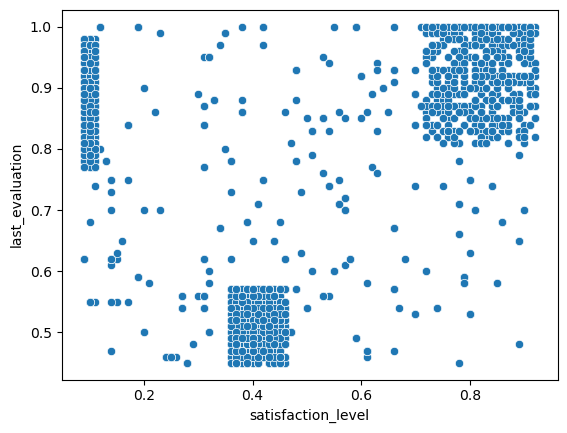

In [22]:
sns.scatterplot(data=cluster_df,x='satisfaction_level',y='last_evaluation')

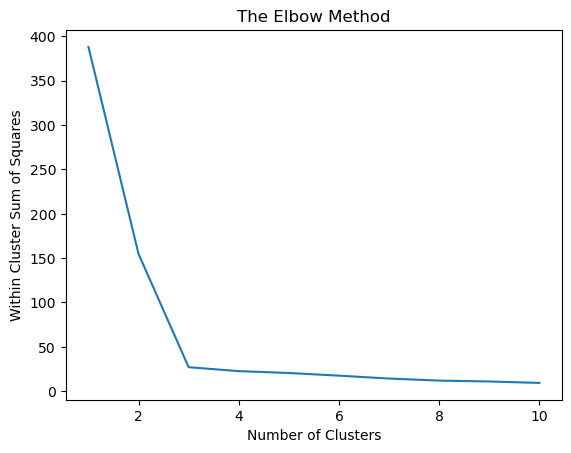

In [23]:
wcss = []
for i in range(1,11):
    model =  KMeans(n_clusters =i, random_state = 101)
    model.fit(cluster_df)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [24]:
model = KMeans(n_clusters = 3,random_state =101)
y_kmeans = model.fit_predict(cluster_df)

In [25]:
pd.Series(y_kmeans).value_counts()

0    1650
1     977
2     944
Name: count, dtype: int64

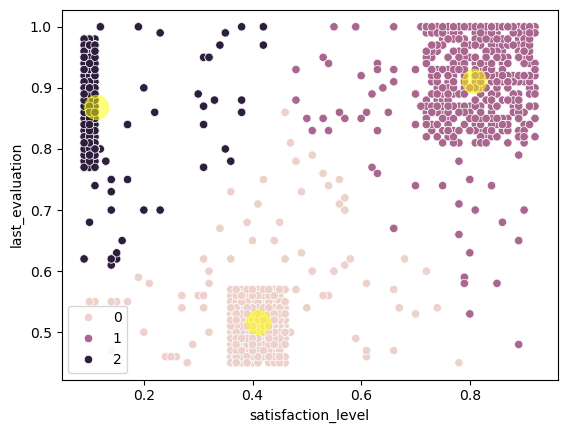

In [26]:
sns.scatterplot(data=cluster_df,x='satisfaction_level',y='last_evaluation',hue=y_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s =300, c='yellow',alpha=0.5)

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

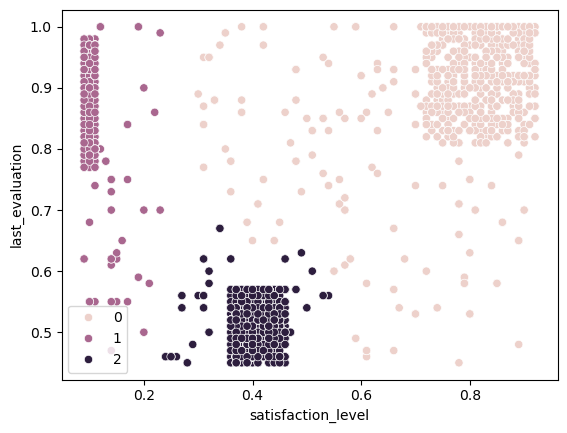

In [27]:
model =  AgglomerativeClustering(n_clusters=3)
y_agg= model.fit_predict(cluster_df)

sns.scatterplot(data=cluster_df,x='satisfaction_level',y='last_evaluation',hue=y_agg)

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

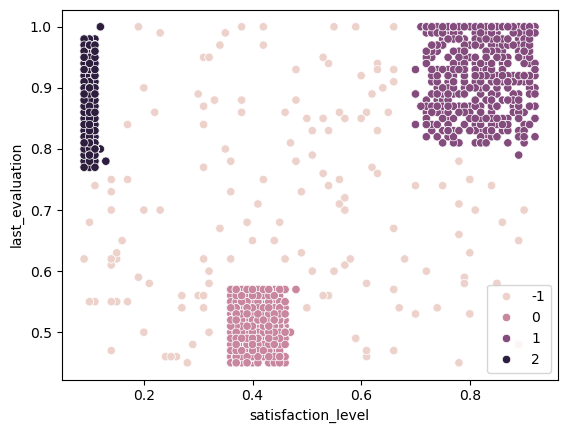

In [28]:
model =  DBSCAN(min_samples =12, eps=0.03)
y_db= model.fit_predict(cluster_df)

sns.scatterplot(data=cluster_df,x='satisfaction_level',y='last_evaluation',hue=y_db)

#### In this case KMeans would be best for clutering the data into 3 different classes
#### Most People who left the Organisation have had less satisfaction and gave poor last evaluation to the company

# Task4

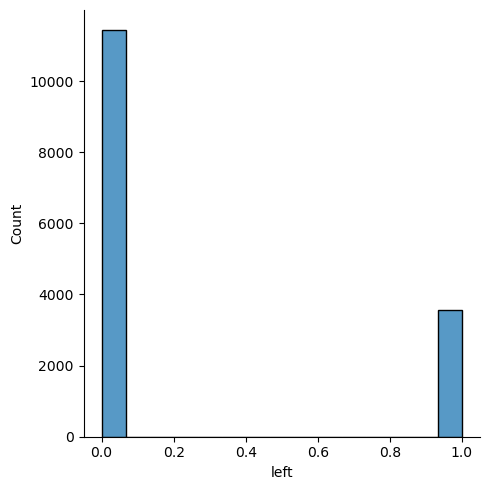

In [31]:
sns.displot(data=df,x='left')

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df_cat= pd.get_dummies(df[['department','salary']],drop_first=True,dtype='int')
df_cat

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0,1,0
14995,0,0,0,0,0,0,0,1,0,1,0
14996,0,0,0,0,0,0,0,1,0,1,0
14997,0,0,0,0,0,0,0,1,0,1,0


In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [35]:
df_num= df[['satisfaction_level', 'last_evaluation', 'number_project',
            'average_monthly_hours', 'time_spend_company', 'Work_accident',
            'promotion_last_5years']]
df_num.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [36]:
X= pd.merge(df_num,df_cat,left_index=True, right_index=True)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
y= df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
X_train,X_test,y_train,y_test= tts(X,y,random_state=123,test_size=0.2)

In [39]:
X_train.shape

(11999, 18)

In [40]:
smote= SMOTE(random_state=101)
X_train, y_train= smote.fit_resample(X_train,y_train)
X_train.shape

(18274, 18)

# Task5 and Task6

In [42]:
best_params= []
def model_report(model,param_grid,X_train,X_test,y_train,y_test):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
    from sklearn.model_selection import GridSearchCV
    grid= GridSearchCV(model, param_grid, cv= 5,n_jobs=-1)
    grid.fit(X=X_train, y=y_train)
    y_pred= grid.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    
    cm_display= ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
    cm_display.plot(colorbar = False)
    plt.show()

    y_pred_prob= grid.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    J = tpr- fpr
    optimal_thresh_index = np.argmax(J)
    optimal_thresh = thresholds[optimal_thresh_index]
    
    plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')
    plt.scatter(fpr[optimal_thresh_index], tpr[optimal_thresh_index], color ='red',
                label = f'Optimal Threshold {optimal_thresh:.2f}')
    plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characterstics ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()
    best_params.append(grid.best_params_)

In [43]:
log_model= LogisticRegression()

In [44]:
log_param_grid= {'C':np.append(np.linspace(0,1,11),np.arange(2,10)),'max_iter':[10000]}

C:\Users\hriti\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hriti\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hriti\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hriti\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hriti\anaconda3\Lib\site-packages\sk

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      2291
           1       0.48      0.74      0.58       709

    accuracy                           0.75      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.80      0.75      0.77      3000



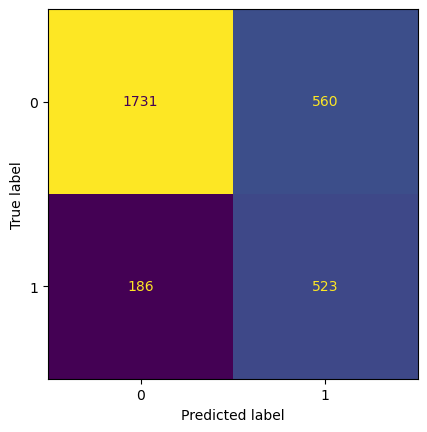

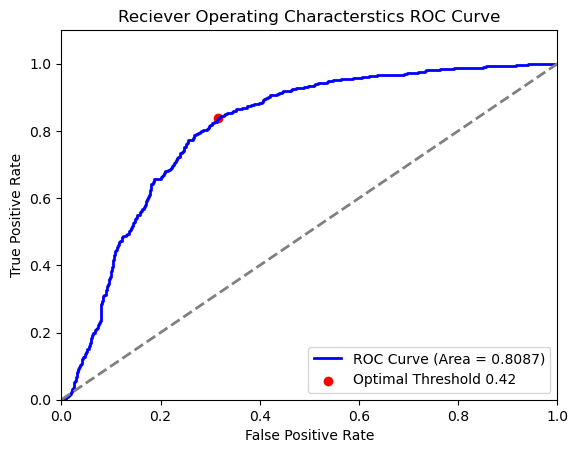

In [45]:
model_report(log_model,log_param_grid,X_train,X_test,y_train,y_test)

In [46]:
rfc_model= RandomForestClassifier()

In [47]:
rfc_param_grid= {'n_estimators':[64,100,128,200],'max_depth':np.arange(3,7)}

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.93      0.92      0.92       709

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



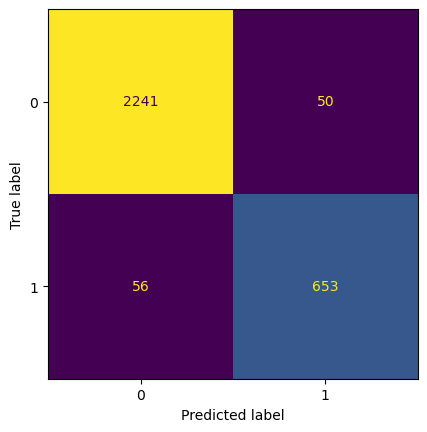

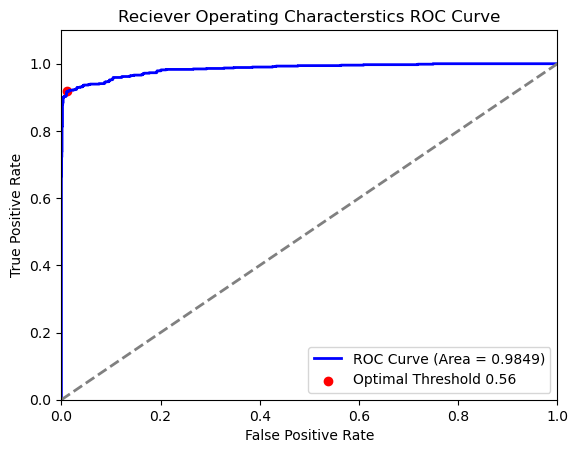

In [48]:
model_report(rfc_model,rfc_param_grid,X_train,X_test,y_train,y_test)

In [49]:
grad_model= GradientBoostingClassifier()

In [50]:
grad_param_grid= {'max_depth':np.arange(3,7),'n_estimators':[64,100,128,200],'learning_rate':np.append(np.linspace(0,1,11),np.arange(2,11,3))}

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.98      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



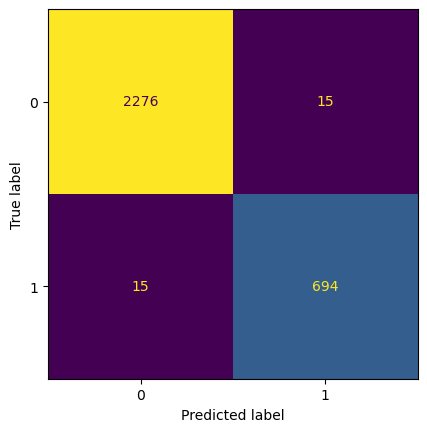

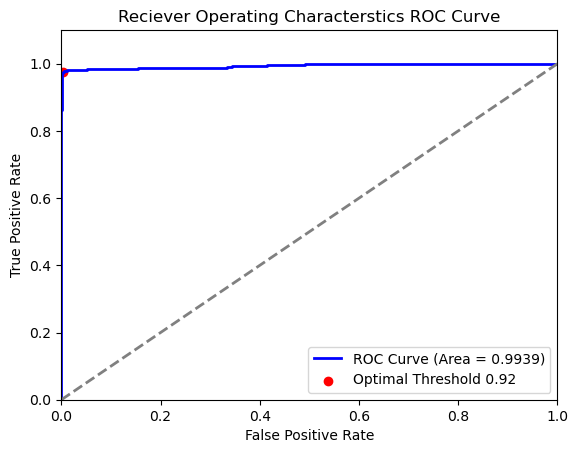

In [51]:
model_report(grad_model,grad_param_grid,X_train,X_test,y_train,y_test)

In [52]:
best_params

[{'C': 0.1, 'max_iter': 10000},
 {'max_depth': 6, 'n_estimators': 200},
 {'learning_rate': 0.30000000000000004, 'max_depth': 6, 'n_estimators': 200}]

In [53]:
best_model= GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=6, n_estimators=200)

In [54]:
best_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=6,
                           n_estimators=200)

In [55]:
y_pred= best_model.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
y_pred_proba= best_model.predict_proba(X)[:,1]
y_pred_proba

array([0.99988623, 0.99702422, 0.99997247, ..., 0.9998615 , 0.99999086,
       0.99976254])

In [57]:
np.round(y_pred_proba,3)

array([1.   , 0.997, 1.   , ..., 1.   , 1.   , 1.   ])

In [58]:
y.to_numpy()

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

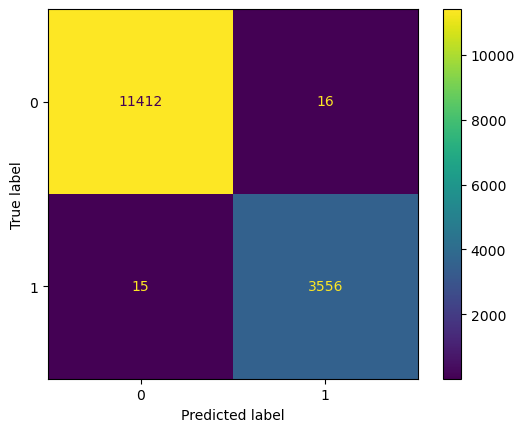

In [59]:
disp= ConfusionMatrixDisplay(confusion_matrix(y,y_pred))
disp.plot()
plt.show()

In [60]:
accuracy_score(y,y_pred)

0.9979331955463697

In [61]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11428
           1       1.00      1.00      1.00      3571

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



#### Precision and Recall are both important factors to consider for evaluating performance of the model

# Task7

In [64]:
final_prediction_df= pd.DataFrame({
    'Left':y.to_numpy(),
    'Prfedicted_Left':y_pred,
    'Predicted_Probability_Left':np.round(y_pred_proba,3)})

final_prediction_df.head(10)

,Left,Prfedicted_Left,Predicted_Probability_Left
0,1,1,1.000
1,1,1,0.997
2,1,1,1.000
3,1,1,0.994
4,1,1,1.000
5,1,1,1.000
6,1,1,1.000
7,1,1,0.999
8,1,1,1.000
9,1,1,1.000


In [65]:
final_prediction_df= final_prediction_df[final_prediction_df['Left']==0]
final_prediction_df['Left'].value_counts()

Left
0    11428
Name: count, dtype: int64

In [66]:
green_index= final_prediction_df[final_prediction_df['Predicted_Probability_Left']<0.2].index
green_index

Index([ 2000,  2001,  2002,  2003,  2004,  2005,  2006,  2007,  2008,  2009,
       ...
       14201, 14202, 14203, 14204, 14205, 14206, 14207, 14208, 14209, 14210],
      dtype='int64', length=11397)

In [67]:
yellow_index= final_prediction_df[(final_prediction_df['Predicted_Probability_Left']<0.6) & (final_prediction_df['Predicted_Probability_Left']>=0.2)].index
yellow_index

Index([ 2095,  2590,  2727,  3525,  3754,  4094,  4263,  5540,  7004,  7086,
        7519,  7664,  7732,  7816,  8629,  9835, 10265],
      dtype='int64')

In [68]:
orange_index= final_prediction_df[(final_prediction_df['Predicted_Probability_Left']>=0.6) & (final_prediction_df['Predicted_Probability_Left']<0.9)].index
orange_index

Index([3075, 3762, 5384, 8255, 8806, 10673, 12884], dtype='int64')

In [69]:
red_index= final_prediction_df[(final_prediction_df['Predicted_Probability_Left']>=0.9)].index
red_index

Index([4785, 5565, 6263, 6500, 7877, 9913, 10098], dtype='int64')

In [70]:
green_df= final_prediction_df.loc[green_index]
green_df.head(10)

,Left,Prfedicted_Left,Predicted_Probability_Left
2000,0,0,0.003
2001,0,0,0.000
2002,0,0,0.009
2003,0,0,0.002
2004,0,0,0.000
2005,0,0,0.007
2006,0,0,0.000
2007,0,0,0.001
2008,0,0,0.006
2009,0,0,0.001


In [71]:
green_df= df.loc[green_index]
#green_df.head(10)

In [72]:
green_df.describe(include='object')

,department,salary
count,11397,11397
unique,10,3
top,sales,low
freq,3117,5125


In [73]:
green_df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11397.000000,11397.000000,11397.000000,11397.000000,11397.000000,11397.000000,11397.0,11397.000000
mean,0.667309,0.715301,3.785733,199.020181,3.378784,0.175222,0.0,0.026323
std,0.216876,0.161986,0.978030,45.664544,1.563104,0.380173,0.0,0.160100
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [74]:
yellow_df= df.loc[yellow_index]
#yellow_df

In [75]:
yellow_df.describe(include='object')

,department,salary
count,17,17
unique,6,3
top,technical,low
freq,5,12


In [76]:
yellow_df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0
mean,0.431176,0.785294,4.117647,219.941176,3.647059,0.058824,0.0,0.0
std,0.227373,0.157921,1.576482,51.264596,1.221739,0.242536,0.0,0.0
min,0.150000,0.480000,2.000000,133.000000,2.000000,0.000000,0.0,0.0
25%,0.190000,0.670000,3.000000,172.000000,3.000000,0.000000,0.0,0.0
50%,0.440000,0.850000,4.000000,245.000000,4.000000,0.000000,0.0,0.0
75%,0.570000,0.900000,6.000000,252.000000,4.000000,0.000000,0.0,0.0
max,0.850000,0.990000,6.000000,282.000000,6.000000,1.000000,0.0,0.0


In [77]:
orange_df= df.loc[orange_index]
#orange_df

In [78]:
orange_df.describe(include='object')

,department,salary
count,7,7
unique,4,3
top,sales,high
freq,3,3


In [79]:
orange_df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0
mean,0.442857,0.787143,4.428571,178.857143,4.285714,0.142857,0.0,0.0
std,0.162451,0.177737,1.397276,44.311129,1.112697,0.377964,0.0,0.0
min,0.200000,0.570000,2.000000,136.000000,3.000000,0.000000,0.0,0.0
25%,0.335000,0.660000,4.000000,163.000000,3.500000,0.000000,0.0,0.0
50%,0.460000,0.720000,4.000000,169.000000,4.000000,0.000000,0.0,0.0
75%,0.570000,0.950000,5.500000,173.000000,5.000000,0.000000,0.0,0.0
max,0.630000,1.000000,6.000000,275.000000,6.000000,1.000000,0.0,0.0


In [80]:
red_df= df.loc[red_index]
#red_df

In [81]:
red_df.describe(include='object')

,department,salary
count,7,7
unique,5,2
top,sales,low
freq,3,5


In [82]:
red_df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0
mean,0.650000,0.755714,3.857143,233.714286,3.857143,0.142857,0.0,0.0
std,0.224054,0.165414,1.573592,43.018269,1.214986,0.377964,0.0,0.0
min,0.400000,0.460000,2.000000,140.000000,2.000000,0.000000,0.0,0.0
25%,0.425000,0.705000,2.500000,235.000000,3.000000,0.000000,0.0,0.0
50%,0.730000,0.840000,4.000000,249.000000,4.000000,0.000000,0.0,0.0
75%,0.835000,0.855000,5.000000,255.500000,5.000000,0.000000,0.0,0.0
max,0.900000,0.870000,6.000000,266.000000,5.000000,1.000000,0.0,0.0


#### RED ZONE- Majority Employees in Red Zone have low salary still high number of average projects with higher working hours
#### ORANGE ZONE- Majority Employees in Orange Zone have a high salary and very high number of projects
#### YELLOW ZONE- Majority Employees avg Work life Balance
#### GREEN ZONE- Employees here have good Work-Life Balance

#### People with higer Work Load should be Compensated and Appreciated More
#### Should try to balance work between Employees with higher number of project and less number of projects